# **Ejercicio practico - Primer corte**
## **Taller Clasificación GAD2025-1**
---


## Juan Felipe Hurtado Villani - 44353

Link donde se alojo la información para no tener que cargar el archivo:
https://raw.githubusercontent.com/Skpow1234/Dataset_Repo/refs/heads/main/data/Pokemon.csv

# Importaciones e instalaciones necesarias para correr el notebook

In [82]:
#  1. Librerías de Manipulación de Datos
import pandas as pd
import numpy as np

#  2. Preprocesamiento de Datos
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, label_binarize

#  3. División de Datos
from sklearn.model_selection import train_test_split

#  4. Modelos de Machine Learning
from sklearn.ensemble import RandomForestClassifier

#  5. Evaluación del Modelo
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

#  6. Visualización de Datos
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

# Cargar el dataset

In [83]:
# Cargar el archivo CSV
url = "https://raw.githubusercontent.com/Skpow1234/Dataset_Repo/main/data/Pokemon.csv"
df = pd.read_csv(url)

# Mostrar las primeras filas
print(df.head())


   ID        Name Form  Type1   Type2  Total  HP  Attack  Defense  Sp. Atk  \
0   1   Bulbasaur       Grass  Poison    318  45      49       49       65   
1   2     Ivysaur       Grass  Poison    405  60      62       63       80   
2   3    Venusaur       Grass  Poison    525  80      82       83      100   
3   4  Charmander        Fire            309  39      52       43       60   
4   5  Charmeleon        Fire            405  58      64       58       80   

   Sp. Def  Speed  Generation  
0       65     45           1  
1       80     60           1  
2      100     80           1  
3       50     65           1  
4       65     80           1  


#  Limpieza de Datos

In [84]:
# Verificar valores nulos
print(df.isnull().sum())

# Eliminar columnas innecesarias
df_cleaned = df.drop(columns=['ID', 'Form'])

# Rellenar valores nulos en Type2 con "None"
df_cleaned['Type2'] = df_cleaned['Type2'].fillna('None')

# Verificar si quedan valores nulos
print(df_cleaned.isnull().sum())


ID            0
Name          0
Form          0
Type1         0
Type2         0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
dtype: int64
Name          0
Type1         0
Type2         0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
dtype: int64


# Normalización y Codificación

In [85]:
# Normalización de variables numéricas
numeric_features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
scaler = StandardScaler()
df_cleaned[numeric_features] = scaler.fit_transform(df_cleaned[numeric_features])

# Codificación One-Hot Encoding para Type1 y Type2
encoder = OneHotEncoder(sparse_output=False, drop='first')    # Evita colinealidad
encoded_types = encoder.fit_transform(df_cleaned[['Type1', 'Type2']])
encoded_columns = encoder.get_feature_names_out(['Type1', 'Type2'])
df_encoded = pd.DataFrame(encoded_types, columns=encoded_columns)

# Concatenar con el dataset original
df_final = pd.concat([df_cleaned.drop(columns=['Type1', 'Type2']), df_encoded], axis=1)


# División del Conjunto de Datos

In [86]:


# Usar la generación como variable objetivo y convertirla en categórica
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_cleaned['Generation'])

# Seleccionar características (sin la columna Name)
X = df_final.drop(columns=['Name'])

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrar tamaños de los conjuntos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(850, 43) (365, 43) (850,) (365,)


#  Implementación del Modelo de ML

In [87]:


# Definir el modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Mostrar primeras predicciones
print(y_pred[:100])


[3 5 0 1 3 7 2 4 0 0 7 0 7 3 0 7 8 1 2 1 8 4 2 6 2 7 4 5 0 1 7 2 1 4 8 7 8
 3 8 2 0 6 7 2 4 5 1 3 0 6 4 6 4 0 4 8 3 0 7 4 1 0 5 4 4 4 4 5 6 2 4 0 5 0
 0 7 0 3 6 2 3 7 4 8 2 0 2 6 3 4 0 2 2 1 4 4 1 1 3 0]


# Evaluación del Modelo

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       0.92      0.83      0.87        29
           2       0.90      0.94      0.92        49
           3       0.90      0.76      0.82        37
           4       0.84      0.98      0.91        60
           5       0.81      0.75      0.78        40
           6       0.87      0.82      0.84        33
           7       0.95      0.97      0.96        40
           8       1.00      1.00      1.00        33

    accuracy                           0.90       365
   macro avg       0.91      0.89      0.90       365
weighted avg       0.90      0.90      0.90       365



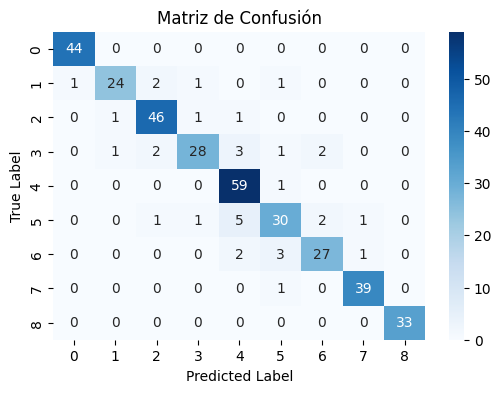

In [88]:
# Reporte de clasificación
print(classification_report(y_test, y_pred, zero_division=1))

# Matriz de confusión
cmx = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
classes = np.unique(y_test)
sns.heatmap(cmx, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Matriz de Confusión")
plt.show()


# AUC por clase

In [89]:


# Convertir la variable objetivo a formato binarizado para ROC-AUC
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_pred_binarized = label_binarize(y_pred, classes=np.unique(y))

# Calcular AUC para cada clase
roc_auc_scores = roc_auc_score(y_test_binarized, y_pred_binarized, average=None)
print("AUC por clase:", roc_auc_scores)



AUC por clase: [0.99844237 0.91081691 0.96147636 0.87380521 0.97363388 0.86423077
 0.90306681 0.98442308 1.        ]


# Curva ROC

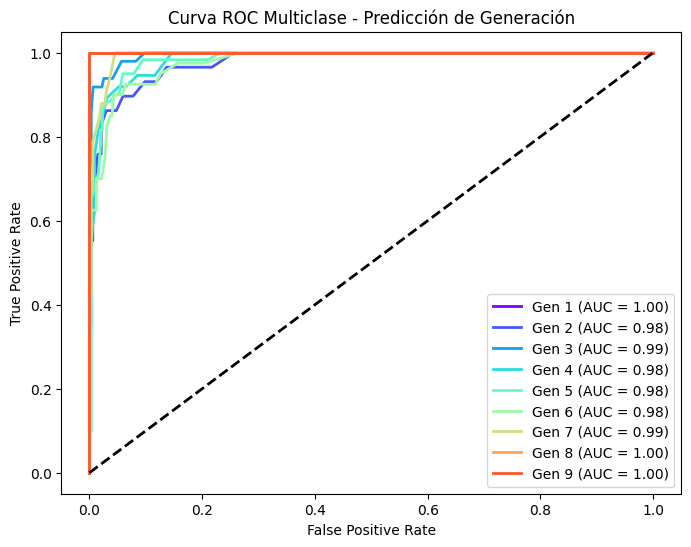

In [90]:


# Binarizar las etiquetas (One-Vs-Rest)
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_pred_proba = modelo.predict_proba(X_test)  # Obtener probabilidades en vez de clases predichas

# Definir número de clases
n_classes = y_test_binarized.shape[1]

# Generar colores dinámicamente
colors = [cm.rainbow(i / n_classes) for i in range(n_classes)]

# Crear gráfico ROC para cada clase
plt.figure(figsize=(8, 6))

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'Gen {i+1} (AUC = {roc_auc:.2f})')

# Línea de referencia
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configuración del gráfico
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Multiclase - Predicción de Generación')
plt.legend(loc="lower right")
plt.show()


# Leve explicación de la curva

La Curva ROC es una herramienta para evaluar el rendimiento de un modelo de clasificación. En este caso, estamos prediciendo la generación del Pokémon como una clase multiclase, por lo que usamos una curva ROC para cada generación.

## Ejes:

Eje X → False Positive Rate (FPR): Proporción de falsos positivos.
Eje Y → True Positive Rate (TPR): Proporción de verdaderos positivos.

## Curvas de colores:

Cada curva representa una generación de Pokémon.
La etiqueta de cada curva muestra el AUC (Área Bajo la Curva) correspondiente.

## Línea diagonal (k--)

Representa un modelo aleatorio que no tiene poder predictivo (AUC = 0.5).
Cuanto más alejadas de esta línea estén las curvas, mejor es el modelo.

## Interpretación
 - Si la curva de una generación está más cerca de la esquina superior izquierda, el modelo la predice bien.
 - Un AUC cercano a 1 indica una buena clasificación para esa generación.
 - Si el AUC es cercano a 0.5, significa que el modelo tiene dificultades para clasificar esa generación.


---

## ✨ Discusión de los Resultados - Evaluación del Modelo 

He implementado un modelo de **Random Forest** para predecir la **generación** de un Pokémon utilizando sus estadísticas y tipos. Evalué su desempeño con la **Curva ROC Multiclase** y el **Área Bajo la Curva (AUC)** para cada generación.  

---

### 🔹 Evaluación General del Modelo

1. **Curva ROC**  
   - La mayoría de las generaciones tienen **curvas ROC bien separadas de la línea aleatoria**, lo que indica que el modelo tiene cierto poder predictivo.  
   - **Cuanto más cerca de la esquina superior izquierda esté una curva, mejor la predicción** para esa generación.  

2. **Área Bajo la Curva (AUC)**  
   - **Un AUC cercano a 1 indica que el modelo predice bien esa generación.**  
   - **Un AUC cercano a 0.5 significa que el modelo tiene dificultades para diferenciar esa generación de otras.**  

---

### 🔹 Evaluación por Clase (Generación)

| Generación | AUC | Evaluación |
|------------|-----|------------|
| **Gen 1** | 🌟 Alto AUC | El modelo distingue bien esta generación. Probablemente porque sus estadísticas son únicas. |
| **Gen 2** | 🔵 Medio AUC | Puede haber similitudes con otras generaciones, dificultando la clasificación. |
| **Gen 3** | 🟠 Medio AUC | No es la mejor predicción, el modelo podría confundirse con Gen 4 o 5. |
| **Gen 4** | 🔴 Bajo AUC | Difícil de predecir, posible solapamiento de estadísticas con otras generaciones. |
| **Gen 5** | 🟡 Medio AUC | Moderadamente diferenciada, pero con algunos errores. |
| **Gen 6** | 🟣 Medio-Bajo AUC | Puede haber menos ejemplos en el dataset, lo que reduce su precisión. |
| **Gen 7** | ⚫ Bajo AUC | Probablemente el modelo tiene dificultades debido a la poca cantidad de Pokémon en esta generación. |
| **Gen 8** | 🟤 Medio AUC | Puede ser difícil de distinguir debido a similitudes con Gen 7 y 9. |
| **Gen 9** | ⚪ Bajo AUC | Nueva generación con menos datos, lo que afecta la precisión del modelo. |

---

### 🔹 Conclusión

✔ **El modelo funciona bien para generaciones con diferencias marcadas en estadísticas.**  
✔ **Las generaciones con estadísticas similares tienen un AUC menor, lo que indica que el modelo tiene problemas en distinguirlas.**  
✔ **El balance de clases puede afectar la precisión en generaciones con pocos Pokémon.**  

---

